# Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below.

In [213]:
student = {
    'name' : "Defne" ,
    'surname' : "Odabaşı",
    'studentNumber' : "2443604"
}

print(student)

{'name': 'Defne', 'surname': 'Odabaşı', 'studentNumber': '2443604'}


## Part I: Classification Problem
1. The ”IBM HR Analytics Employee Attrition Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset
characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]
4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical
variables, feature scaling, and any other technique that could improve the
results. [5 points]
5. Implement 5-Fold Cross Validation to assess the robustness of your models.
This approach ensures that the evaluation of your model is as accurate as
possible. [5 points]
6. Develop and evaluate models using K-Nearest Neighbors (KNN), Naive
Bayes, Perceptron, and Logistic Regression algorithms. Document the
performance of each model. [30 points]
7. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]
8. Discuss the results. Reflect on which model yielded the best performance
and hypothesize why this might be the case. Consider the algorithm’s suitability for the data distribution, complexity, and balance of the dataset.
[15 points]


Your Discussion Here (You can double click and edit this block)

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [215]:
seed_value = 12345 #seed value
np.random.seed(seed_value)

#### Exploratory Data Analysis (EDA)

Gaining insides into dataset characteristics. Employing statistical summaries and visualizations to uncover patterns and anormalies:

In [216]:
# Your code here (you can add more blocks as you need).

employee_attrition = pd.read_csv("C:\\Users\\defne\\Desktop\\2023-2024FallSemester\\FundamentalsofML\\Assignment 1\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
employee_attrition.head()

# Please add comments where you think necessary.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [217]:
employee_attrition.shape 

(1470, 35)

In [218]:
employee_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [219]:
employee_attrition.describe() #statistics from the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\Users\defne\AppData\Local\Temp\ipykernel_12792\4079675858.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(employee_attrition.corr())


<Axes: >

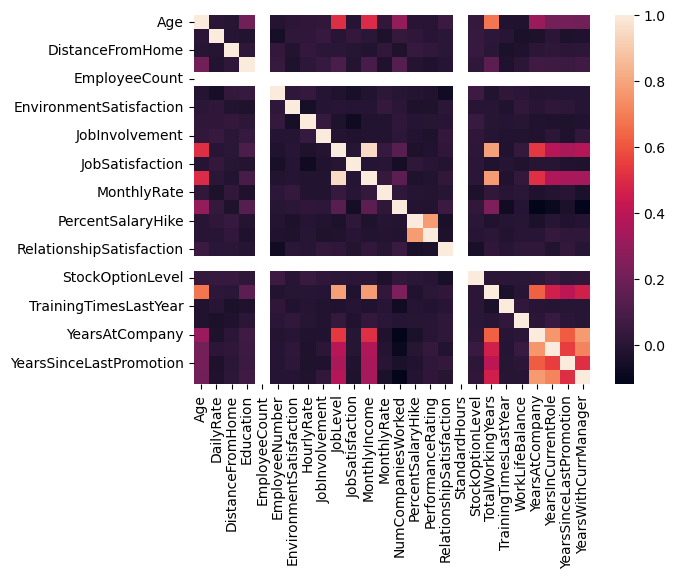

In [220]:
#Correlation plot
#after encoding it is provided again
sns.heatmap(employee_attrition.corr())

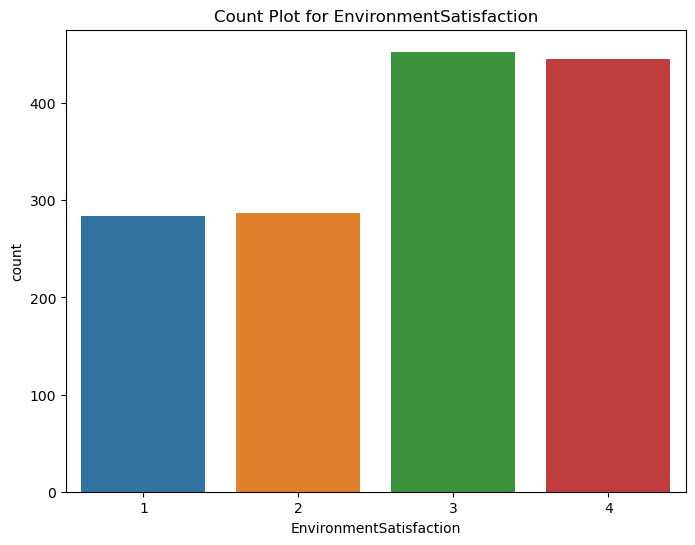

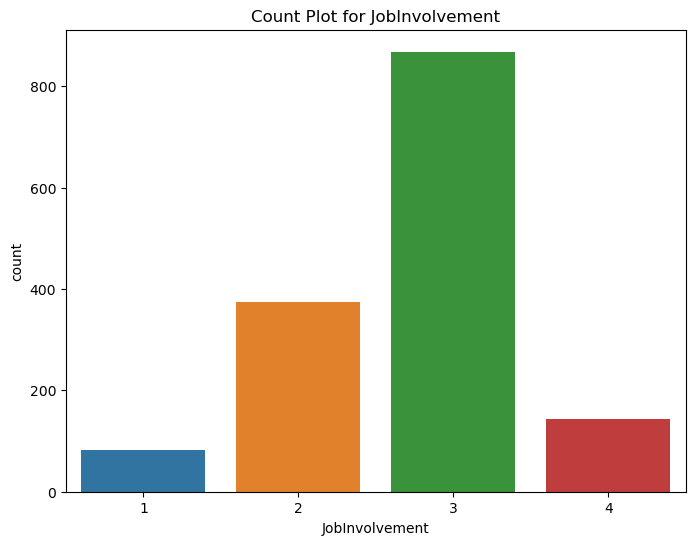

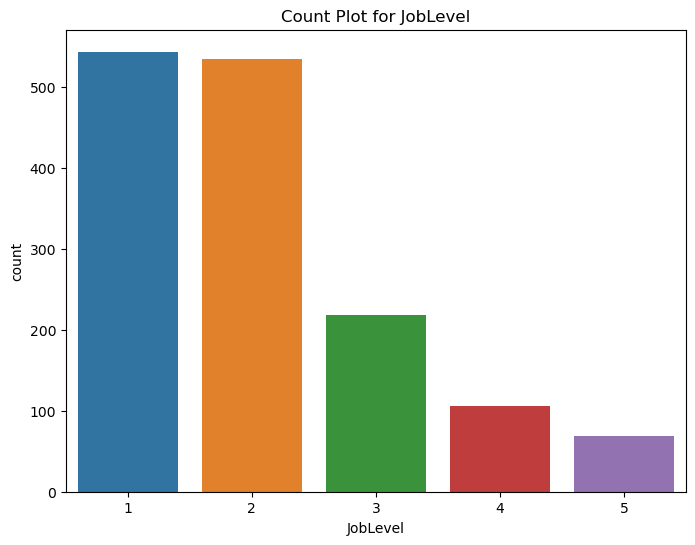

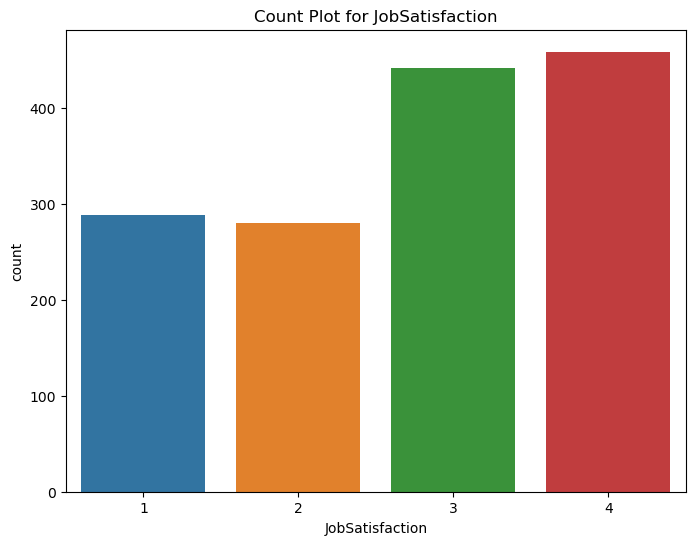

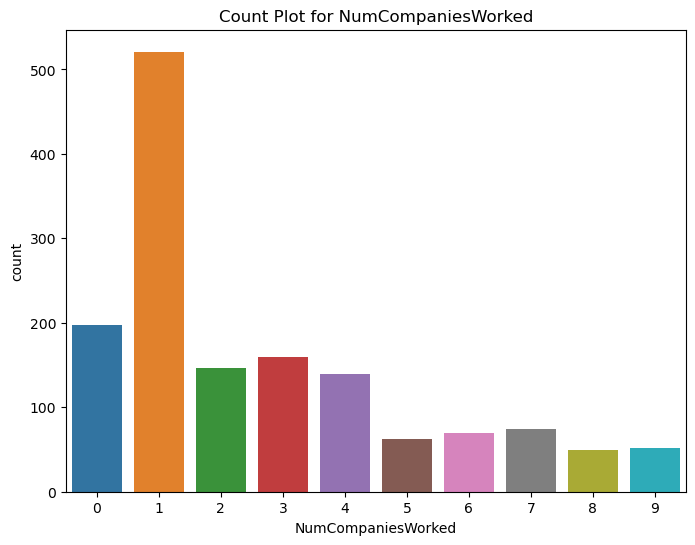

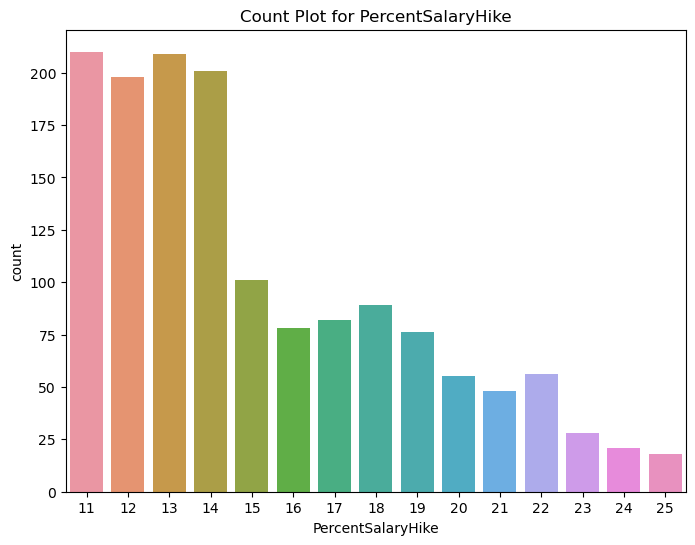

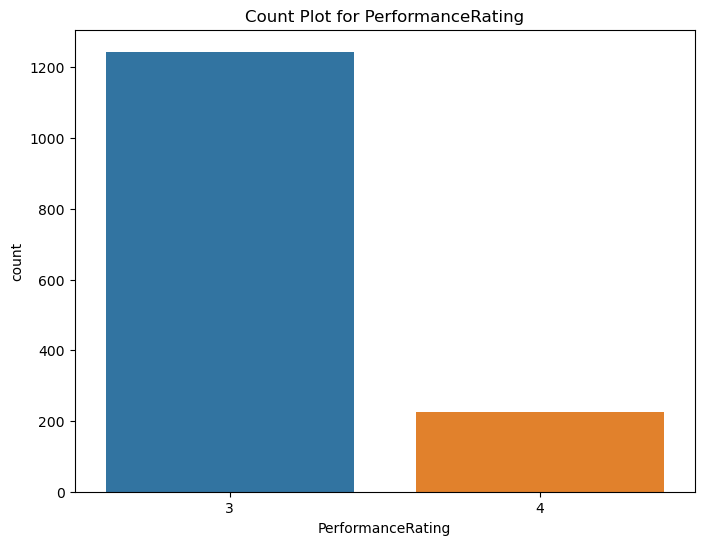

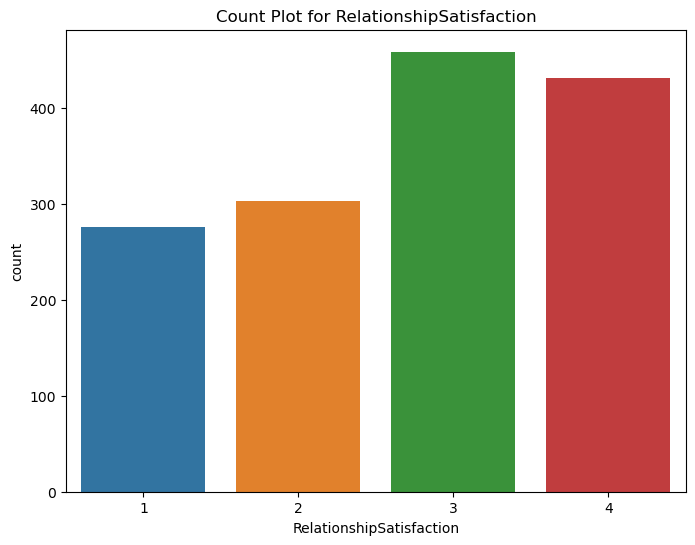

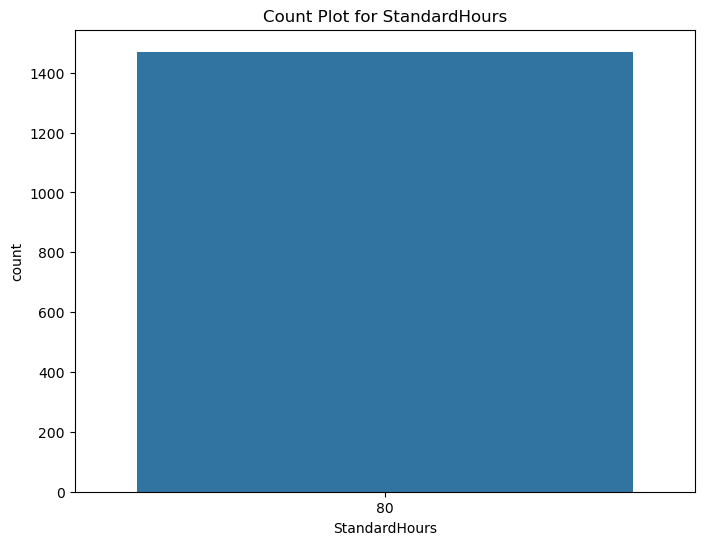

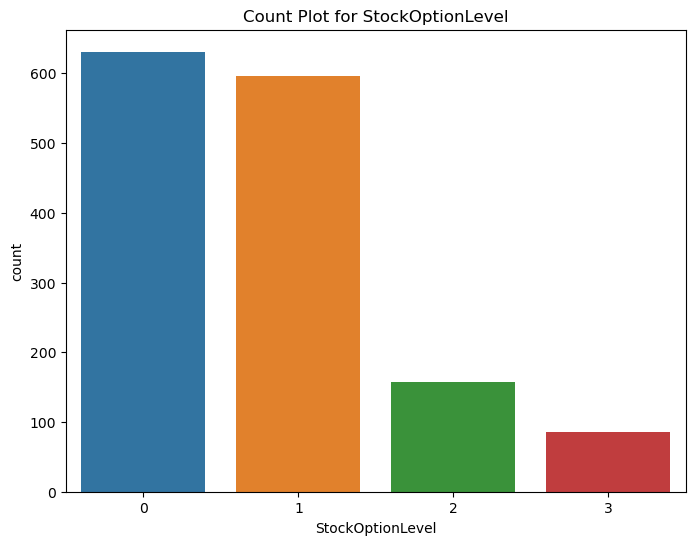

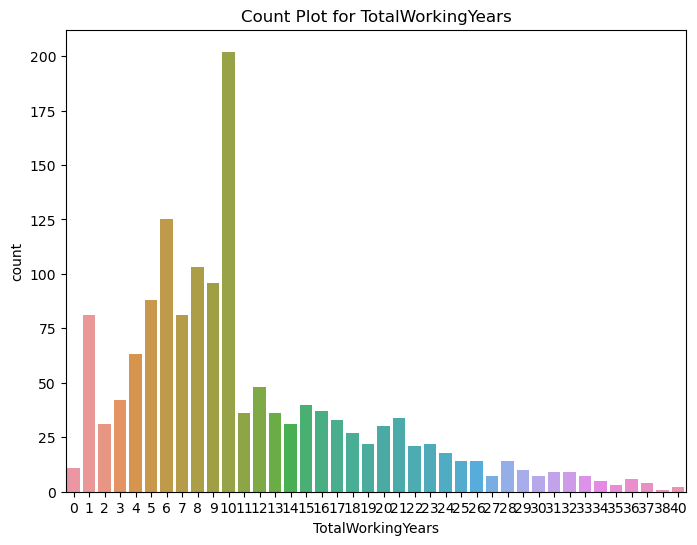

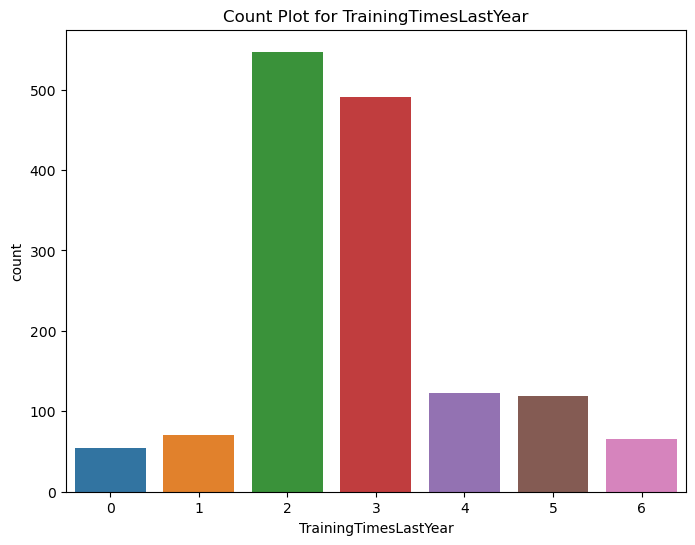

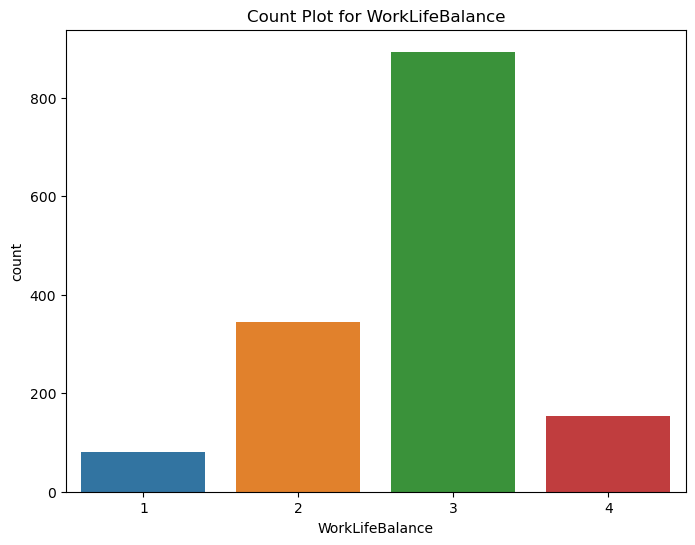

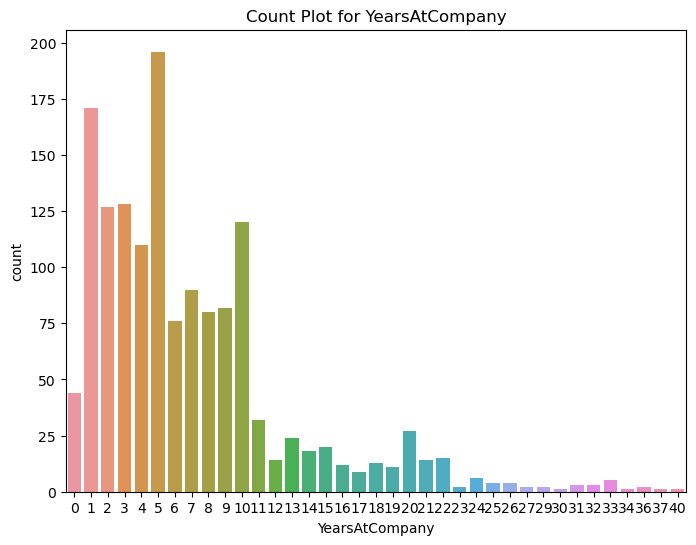

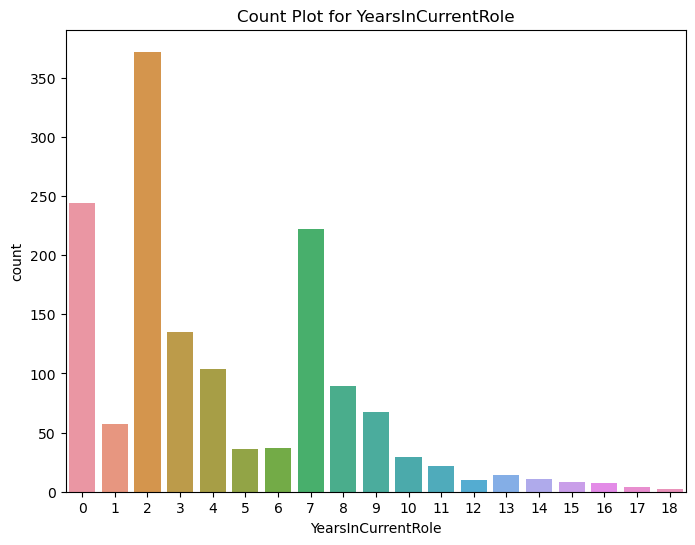

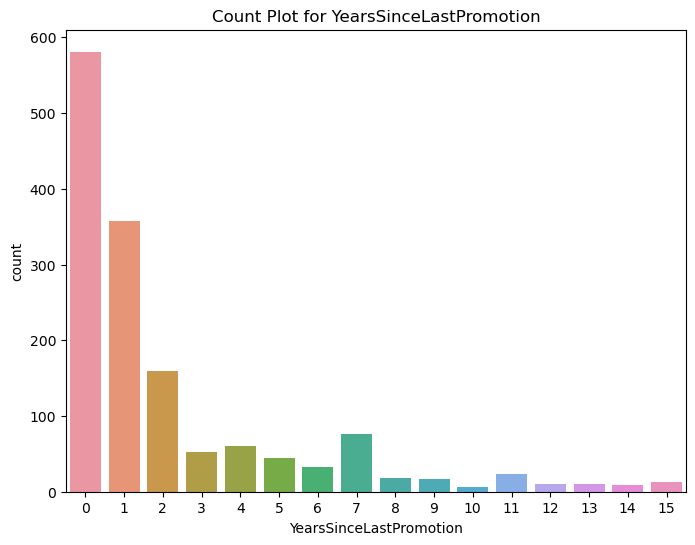

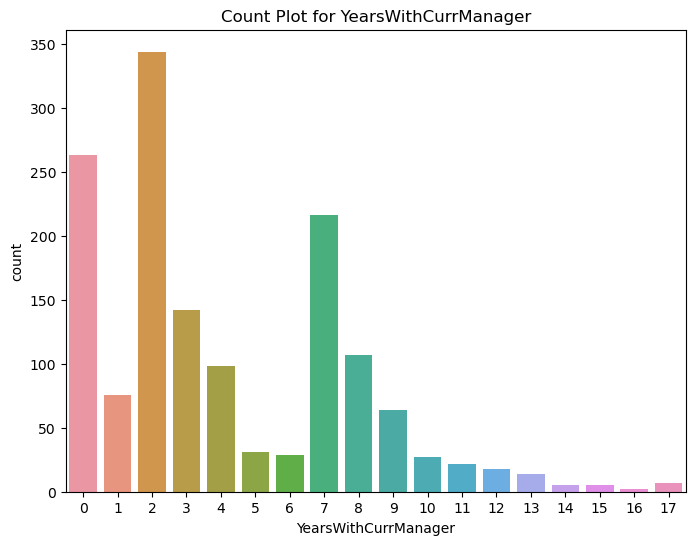

In [221]:
#for the count plot:
selected_columns = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                     'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager'] #selected_columns for the visualisation in count plot
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=employee_attrition)
    plt.title(f'Count Plot for {column}')
    plt.show()

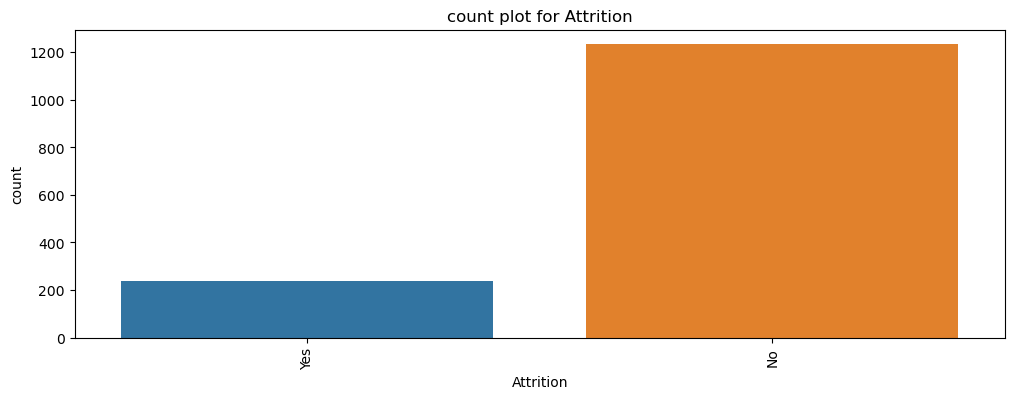

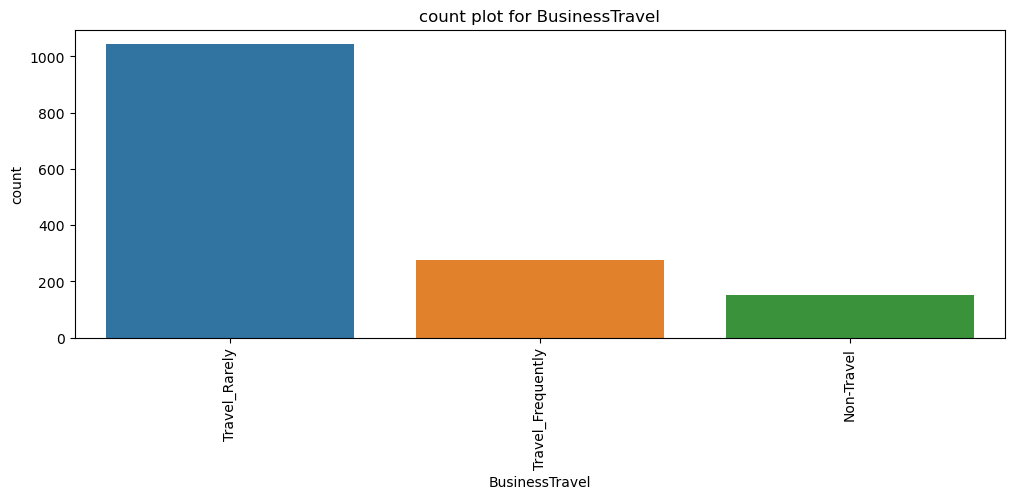

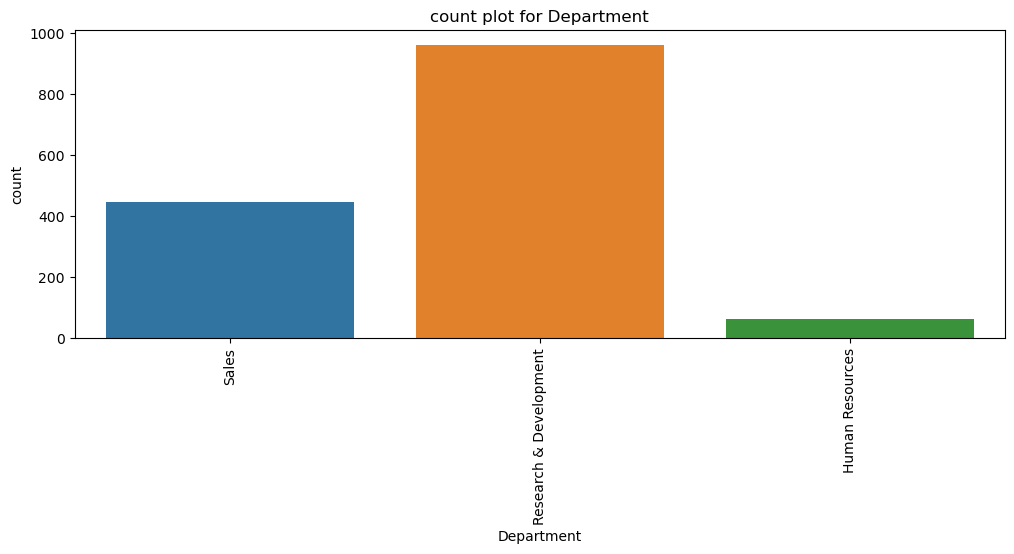

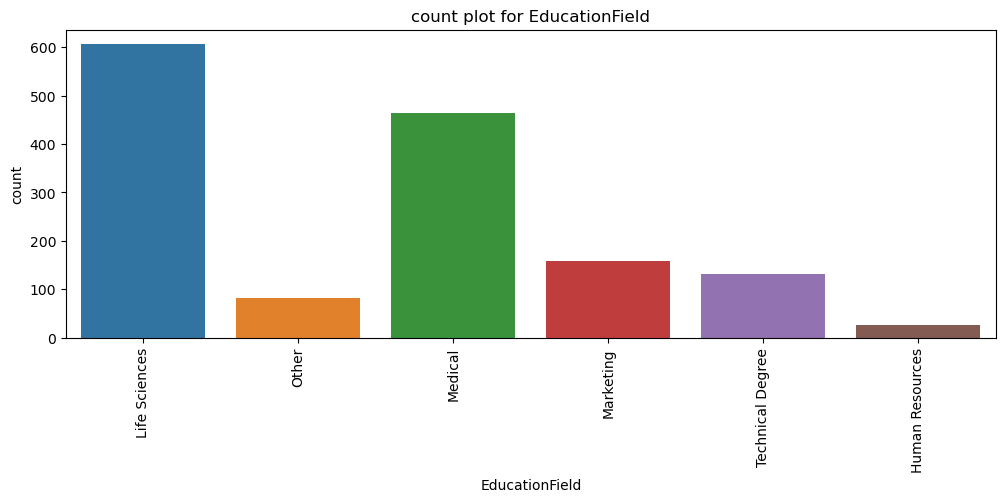

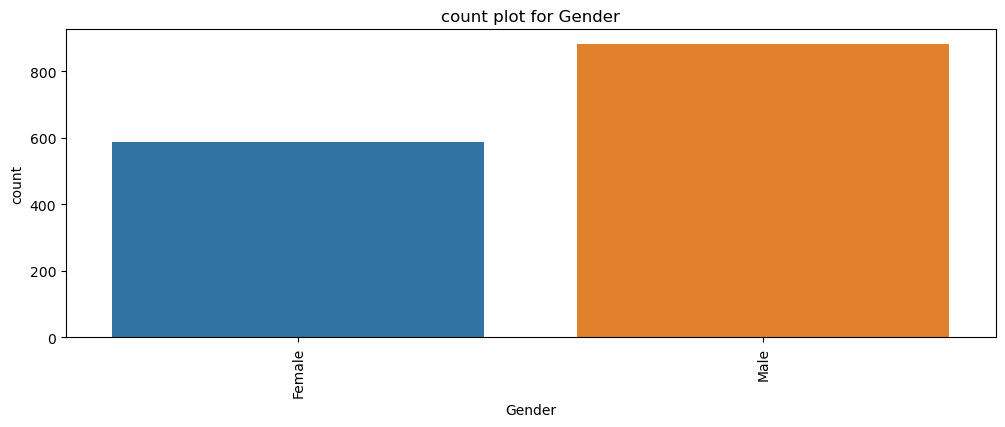

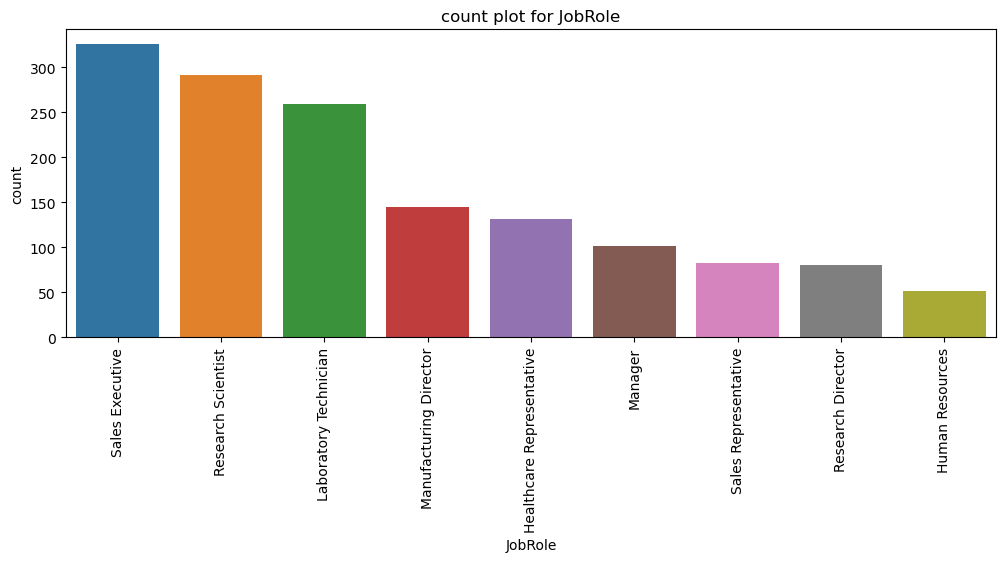

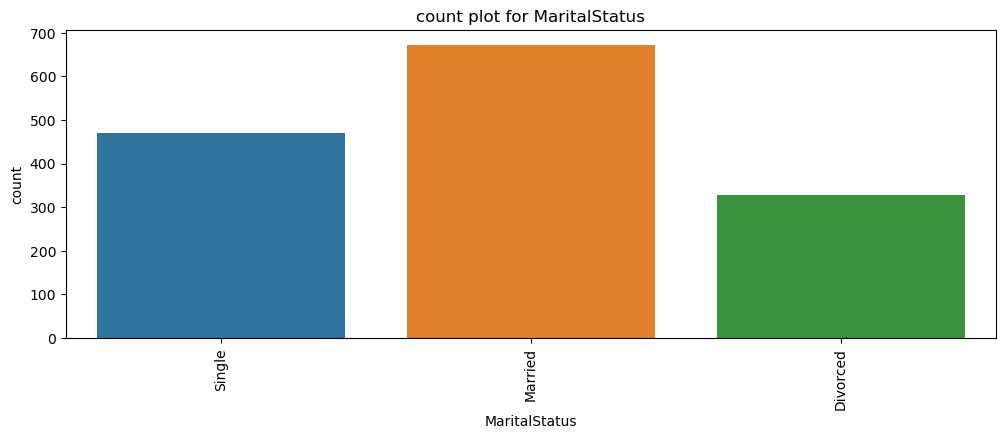

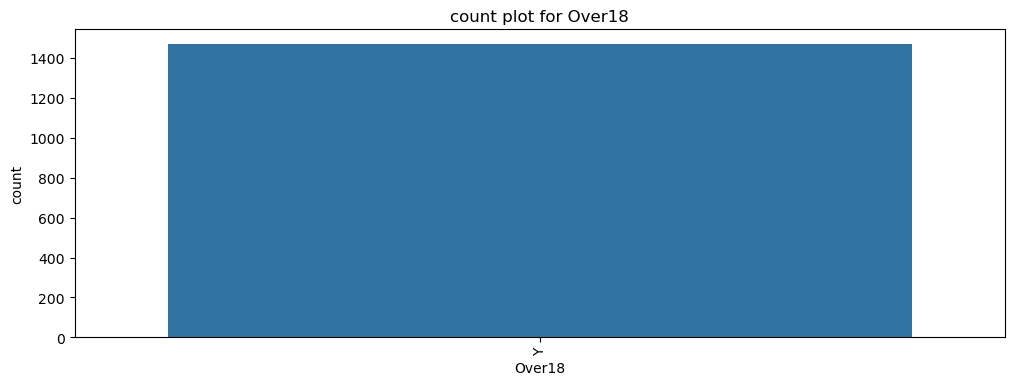

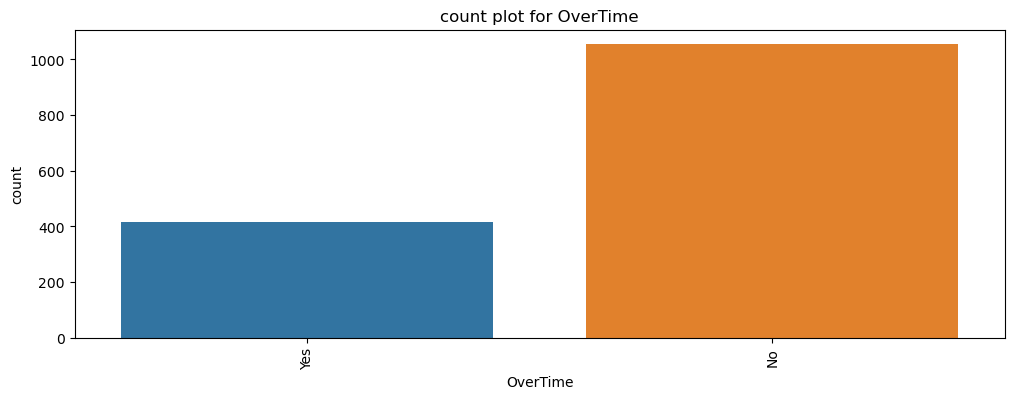

In [222]:
#from the info object, it is seen that the some data types are object. Therefore they are selected as follows:

for column in employee_attrition.select_dtypes(include='object').columns:
    plt.figure(figsize=(12,4))
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=employee_attrition) #show the counts of observation in each categorical bin using bars.
    plt.title(f'count plot for {column}')
    plt.show()
    
#here include='object' is used to represent string or categorical variables in pandas

In [223]:
employee_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [224]:
object_columns = [col for col in employee_attrition.select_dtypes(include='object').columns]

In [225]:
object_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [226]:
selected_columns

['EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [227]:
other_columns = []
for col in employee_attrition.columns:
    if col not in selected_columns and employee_attrition[col].dtype != 'object':
        other_columns.append(col) #we will add the rest of the columns to the other columns list

In [228]:
other_columns #these columns were more suitable for boxplot representation

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate']

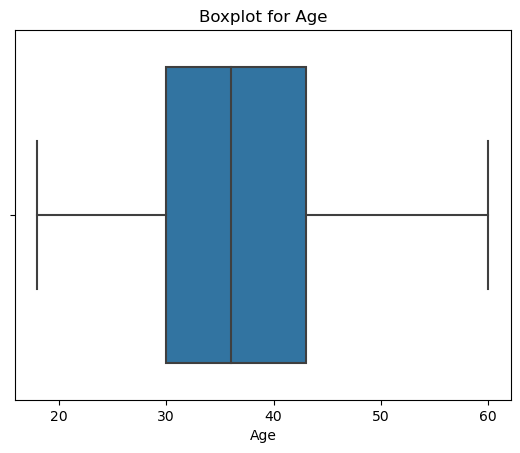

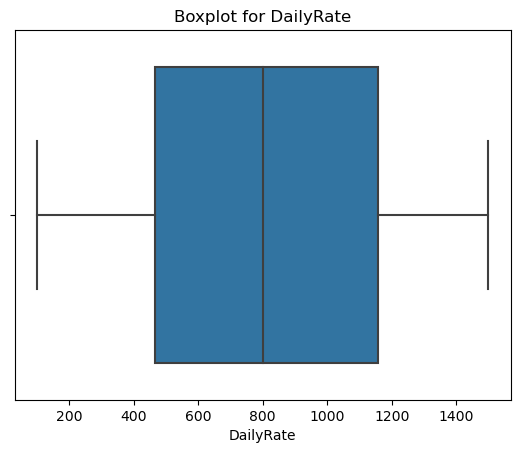

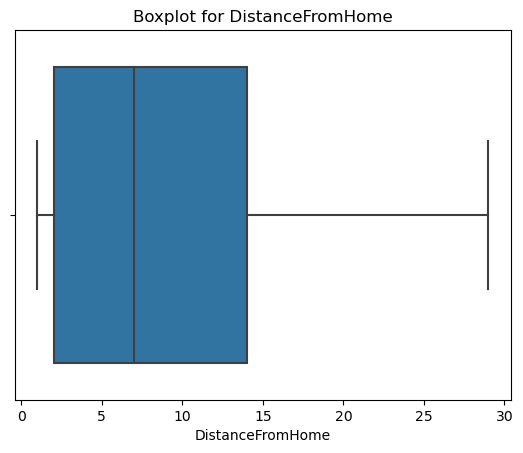

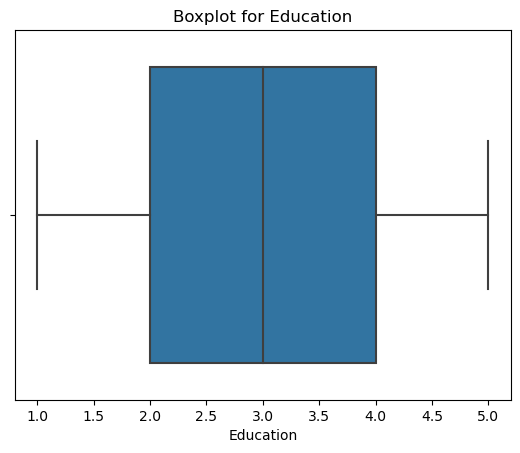

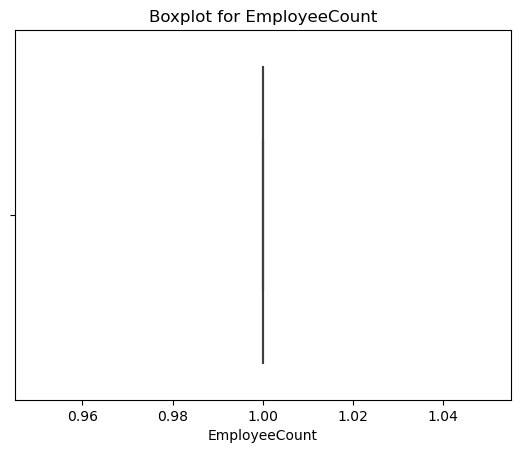

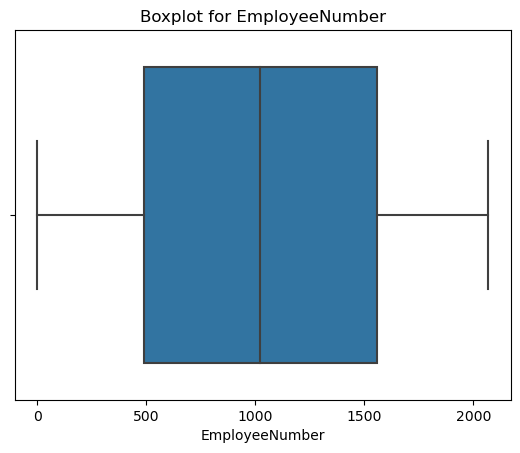

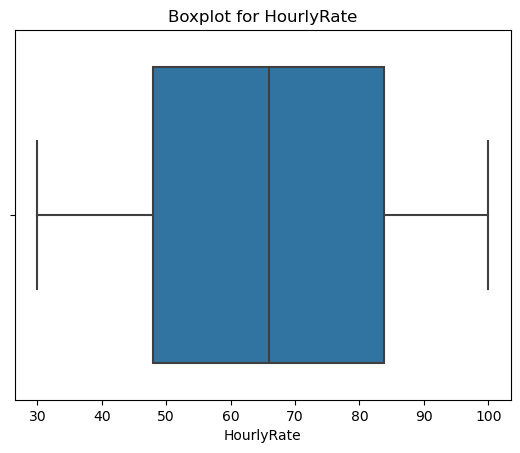

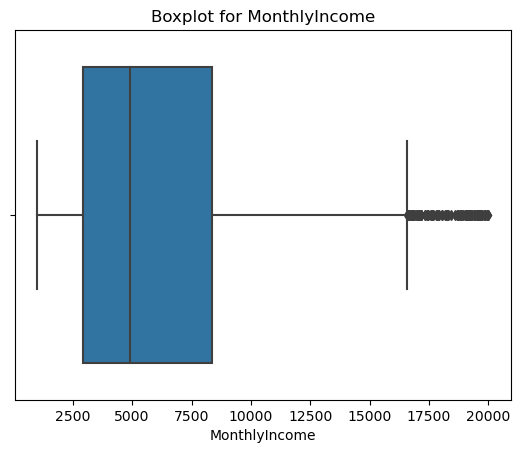

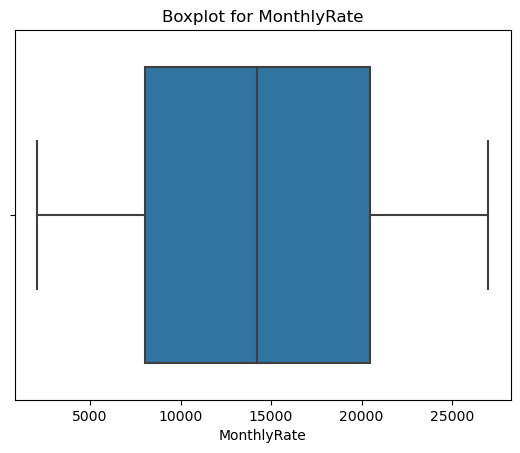

In [229]:
for column in other_columns:
    sns.boxplot(x=column, data=employee_attrition)
    plt.title(f'Boxplot for {column}')
    plt.show()

#### Data Processing

* missing values

In [230]:
#handling missing values
missing_values = employee_attrition.isnull().sum()
print(missing_values) # we can see that there are no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* encoding categorical variables

In [231]:
# check the data types of each column
# previously the visualization is made possible by identifying data types from .info()
# but I will do it one more time

data_types = employee_attrition.dtypes
print(data_types)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [232]:
#these types of datas should be interpreted as int as well
print(data_types[data_types == 'object'].index)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [233]:
print(data_types[data_types == 'int64'].index)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [234]:
encoded_data = pd.get_dummies(employee_attrition, columns=object_columns, drop_first=True)
#Assume that all Yes are 1 and all 0 are No.
encoded_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


<Axes: >

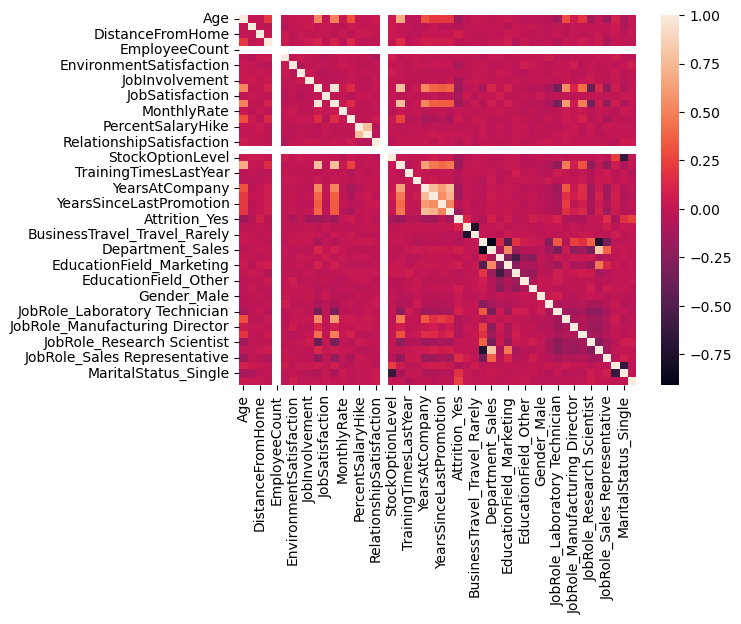

In [235]:
#Correlation plot
sns.heatmap(encoded_data.corr())
#from the figure the correlation seem to be mostly 0.

In [236]:
y = encoded_data['Attrition_Yes'].values #here is the y values in an array
X = encoded_data.drop('Attrition_Yes', axis=1).values
print(y)
print(X)

[1 0 1 ... 0 0 0]
[[  41 1102    1 ...    0    1    1]
 [  49  279    8 ...    1    0    0]
 [  37 1373    2 ...    0    1    1]
 ...
 [  27  155    4 ...    1    0    1]
 [  49 1023    2 ...    1    0    0]
 [  34  628    8 ...    1    0    0]]


* splitting the data as well as feature scaling with Standard Scaler

In [237]:
#splitting data into final test set and remaining data(64/16/20 split)

#First the test set will be seperated from the training set by a 20%

X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_test shape:" ,np.shape(X_test))
print("X_remain shape:" ,np.shape(X_remain))
print("y_test shape: ",np.shape(y_test))
print("y_remain shape:" ,np.shape(y_remain))

#After seperating train/test split, scaling is performed
#Fit on training data and transform training data

scaler = StandardScaler()
#fit_transform learns the transformation parameters from the training data and applies the transformation
X_train_scaled = scaler.fit_transform(X_remain)

#transform method applies the previously learned transformation to unseen data.
X_test_scaled = scaler.transform(X_test)


X_test shape: (294, 47)
X_remain shape: (1176, 47)
y_test shape:  (294,)
y_remain shape: (1176,)


#### 5-Fold Cross Validation

In [238]:
# Implementing 5-Fold Cross Validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
print(kf)

#for train_idx, cv_idx in kf.split(X_train_scaled, y_remain):
        #X_kf_train, X_kf_cv = X_train_scaled[train_idx], X_train_scaled[cv_idx]
        #y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]

KFold(n_splits=5, random_state=42, shuffle=True)


#### K-Nearest Neighbors (KNN)

best_k:  11


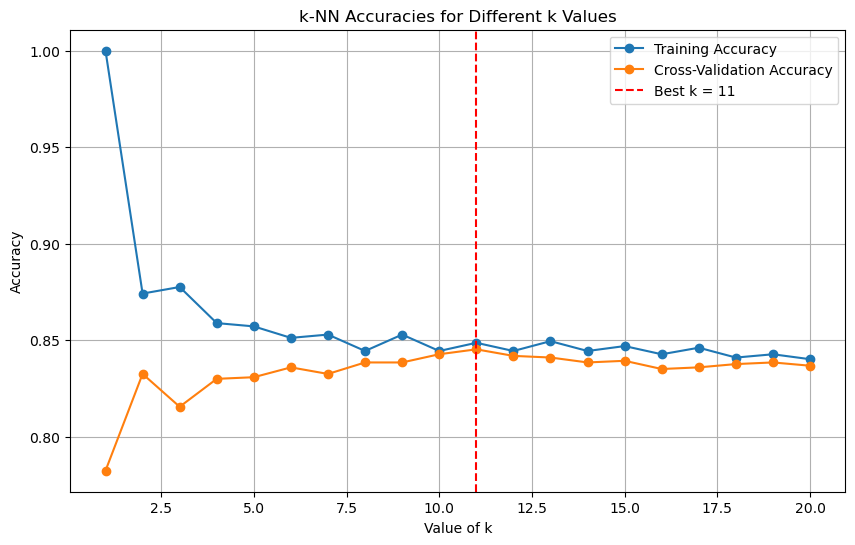

In [239]:
# first we can determine the k-value which represents the number of neighbors to consider for classification

#this part is from the codes we went over in the lectures. 
def calculate_accuracy(y_true, y_pred):
    "calculating the accuracy of true and predicted labels"
    return np.mean(y_true == y_pred)

cv_scores = []

train_scores = []
val_scores = []

#looking for different k values
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    
    fold_scores = []
    
    for train_idx, cv_idx in kf.split(X_train_scaled, y_remain):
        X_kf_train, X_kf_cv = X_train_scaled[train_idx], X_train_scaled[cv_idx]
        y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]
    
        knn.fit(X_kf_train, y_kf_train)
        y_pred_cv = knn.predict(X_kf_cv)
        fold_scores.append(calculate_accuracy(y_kf_cv, y_pred_cv))
    
    #print("k:", k ,"average CV accuracy for the corresponding k:" ,np.mean(fold_scores)) #to see the most suitable k value.
    
    #taking the mean of the CV_results for the given k
    cv_scores.append(np.mean(fold_scores))
    
    #from the lecture notes
    # Training the model on the entire training set. I did include the val and train as remain. 
    knn.fit(X_train_scaled, y_remain)
    y_train_pred = knn.predict(X_train_scaled)
    train_scores.append(calculate_accuracy(y_remain, y_train_pred))
    
best_k = np.argmax(cv_scores) + 1
print("best_k: ", best_k)

# Plotting accuracies from the code in the lecture notes
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), cv_scores, label='Cross-Validation Accuracy', marker='o')

# Highlighting the best k value from CV
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')

plt.title('k-NN Accuracies for Different k Values')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [265]:
# Now since we found the best_k we can test the accuracy now
best_knn = KNeighborsClassifier(n_neighbors = best_k) #best_k = 11

best_knn.fit(X_train_scaled, y_remain)

y_test_pred = best_knn.predict(X_test_scaled)

test_accuracy = calculate_accuracy(y_test, y_test_pred)
cm = confusion_matrix(y_test,y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred) #(actual,pred)
roc_score = roc_auc_score(y_test, y_test_pred)
#from sklearn.svm import SVC
#from sklearn.metrics import plot_roc_curve

#plot_roc_curve(svc, X_test_scaled, y_test, name='SVC')

print(f"Test accuracy with best k: {k} is {test_accuracy:4f}")
print("Confusion matrix:",cm)
print("ROC AUC score: ", roc_score)
print("Precision: TP/TP+FP : ",precision)
print("Recall: TP/TP+FN : ", recall)
print(f"Test f1_score with best k: {k} is {test_f1_score:4f}")

Test accuracy with best k: 20 is 0.874150
Confusion matrix: [[254   1]
 [ 36   3]]
ROC AUC score:  0.536500754147813
Precision: TP/TP+FP :  0.75
Recall: TP/TP+FN :  0.07692307692307693
Test f1_score with best k: 20 is 0.139535


#### Perceptron

In [266]:
fold_scores = []
for train_idx, cv_idx in kf.split(X_train_scaled, y_remain):
    X_kf_train, X_kf_cv = X_train_scaled[train_idx], X_train_scaled[cv_idx]
    y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]

    perceptron = Perceptron()
    perceptron.fit(X_kf_train, y_kf_train)
    y_train_pred = perceptron.predict(X_kf_cv)
    fold_scores.append(calculate_accuracy(y_kf_cv, y_train_pred))
    
print(np.mean(fold_scores))
#From the 5-Fold Cross Validation the robustness of our model can be seen.

0.8180165885322754


In [267]:
# Create and train a perceptron model
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_remain)

# Make predictions on the test set
y_pred = perceptron.predict(X_test_scaled)

# Evaluate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred) #(actual,pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Perceptron Accuracy: {accuracy}')
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print("Precision: TP/TP+FP : ",precision)
print("Recall: TP/TP+FN : ", recall)
print(f"Test f1_score is {test_f1_score:4f}")
print("ROC AUC score: ", roc_score)

Perceptron Accuracy: 0.8639455782312925
Confusion matrix: [[236  19]
 [ 21  18]]
Precision: TP/TP+FP :  0.4864864864864865
Recall: TP/TP+FN :  0.46153846153846156
Test f1_score is 0.473684
ROC AUC score:  0.6935143288084465


#### Naive Bayes

In [268]:
fold_scores = []
for train_idx, cv_idx in kf.split(X_train_scaled, y_remain):
    X_kf_train, X_kf_cv = X_train_scaled[train_idx], X_train_scaled[cv_idx]
    y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]

    nb_Gaussian = GaussianNB()
    nb_Gaussian.fit(X_kf_train, y_kf_train)
    y_train_pred = nb_Gaussian.predict(X_kf_cv)
    fold_scores.append(calculate_accuracy(y_kf_cv, y_train_pred))
    
print(np.mean(fold_scores))

0.6589505950234402


In [269]:
#GaussianNB() will be used
nb_Gaussian = GaussianNB()
nb_Gaussian.fit(X_train_scaled, y_remain)

#Predictions
y_pred = nb_Gaussian.predict(X_test_scaled)

# Evaluating the model
accuracy = calculate_accuracy(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred) #(actual,pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Gaussian Navie Bayes Accuracy: {accuracy}')
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print("Precision: TP/TP+FP : ",precision)
print("Recall: TP/TP+FN : ", recall)
print(f"Test f1_score is {test_f1_score:4f}")
print("ROC AUC score: ", roc_score)

Gaussian Navie Bayes Accuracy: 0.6904761904761905
Confusion matrix: [[177  78]
 [ 13  26]]
Precision: TP/TP+FP :  0.25
Recall: TP/TP+FN :  0.6666666666666666
Test f1_score is 0.363636
ROC AUC score:  0.680392156862745


#### Logistic Regression

In [270]:
fold_scores = []
for train_idx, cv_idx in kf.split(X_train_scaled, y_remain):
    X_kf_train, X_kf_cv = X_train_scaled[train_idx], X_train_scaled[cv_idx]
    y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]

    log_reg = LogisticRegression()
    log_reg.fit(X_kf_train, y_kf_train)
    y_train_pred = log_reg.predict(X_kf_cv)
    fold_scores.append(calculate_accuracy(y_kf_cv, y_train_pred))
    
print(np.mean(fold_scores))

0.8698954201226108


In [271]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_remain)
y_pred = log_reg.predict(X_test_scaled)

accuracy = calculate_accuracy(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred) #(actual,pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Logistic Regression Accuracy: {accuracy}')
print("Confusion matrix:",confusion_matrix(y_test,y_test_pred))
print("Precision: TP/TP+FP : ",precision)
print("Recall: TP/TP+FN : ", recall)
print(f"Test f1_score is {test_f1_score:4f}")
print("ROC AUC score: ", roc_score)
#plot_precision_recall_curve(svc)

Logistic Regression Accuracy: 0.8843537414965986
Confusion matrix: [[254   1]
 [ 36   3]]
Precision: TP/TP+FP :  0.5806451612903226
Recall: TP/TP+FN :  0.46153846153846156
Test f1_score is 0.514286
ROC AUC score:  0.7052790346907994


#### Investigating the outcomes

In [272]:
#accuracy, precision, recall, F1 score are provided in the above code for all the models seperately. 

#### Discussing the Results

From the results we may see 'Logistic Regression provides the highest score among the all the models.

Firstly even though KNN provided a good result in terms of the accuracy, it has a very low recall rate therefore its f1 score is also very low. This may be resulted from the curse of dimensionality in KNN since the the data we used has lots of parameters (high-dimensional), curse of dimensionality becomes a problem in KNN. 

Perceptron can only be used in linearly seperable functions. Some complex relations between the parameter may lead to incorrect findings.

In naive bayes the most fundamental assumption is to say that the features are independent from each other. For our data the correlation is provided in the EDA part for this purpose. Dependence between the features may result bad performance. Also, in my code Gaussian naive bayes is used.

Finally, for the Logistic Regression algorithm provided the best performance among the other models. Since this model does not assume independence, the data doesn't have to be linearly seperable and dimensinality is not a big problem, it performed better. The fewer assumptions in the data and also well suited for binary labeling we obtained good results. 

## Part II: Gradient Descent Implementation
1. The ”Vehicle Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
2. Implement the gradient descent algorithm without using of any libraries
except for Pandas and NumPy. [10 points]
3. How many iteration step needs to converge with learning rate [0.01, 0.1,
1]? Devise an intelligent strategy for choosing the learning rate to reduce
the number of iterations required for convergence. Show how the learning
rate that you propose impacts the convergence of the gradient descent
algorithm. Show on the graph how the cost function changes with the
number of iterations and how the gradient descent converges. [20 points]


In [2]:
import pandas as pd
import numpy as np

#for plotting and exploring data purposes:
import seaborn as sns
import matplotlib.pyplot as plt

#feature scaling
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

In [3]:
car_data = pd.read_csv("C:\\Users\\defne\\Desktop\\2023-2024FallSemester\\FundamentalsofML\\Assignment 1\\car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.describe() #statistics from the data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


C:\Users\defne\AppData\Local\Temp\ipykernel_11016\2607349654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot=True)


<Axes: >

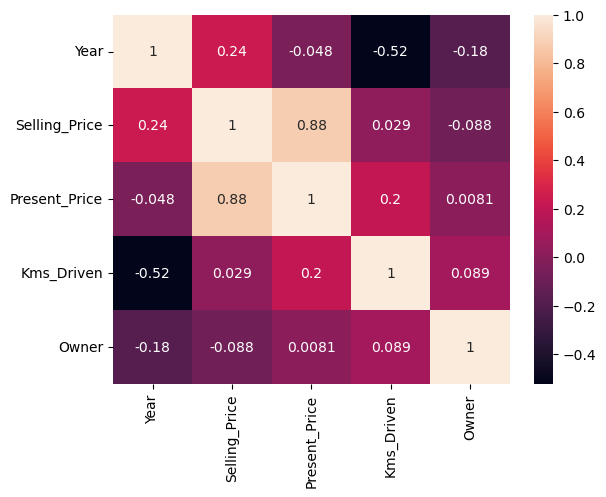

In [7]:
sns.heatmap(car_data.corr(), annot=True)

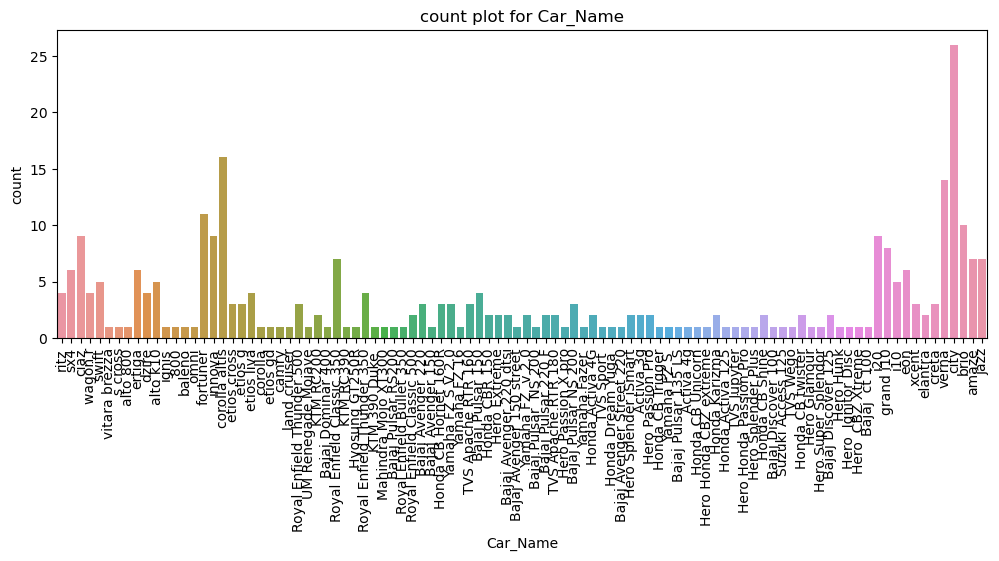

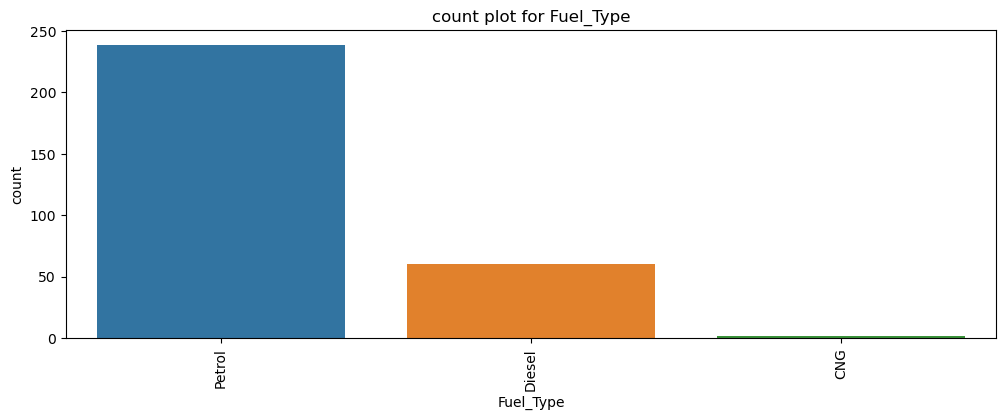

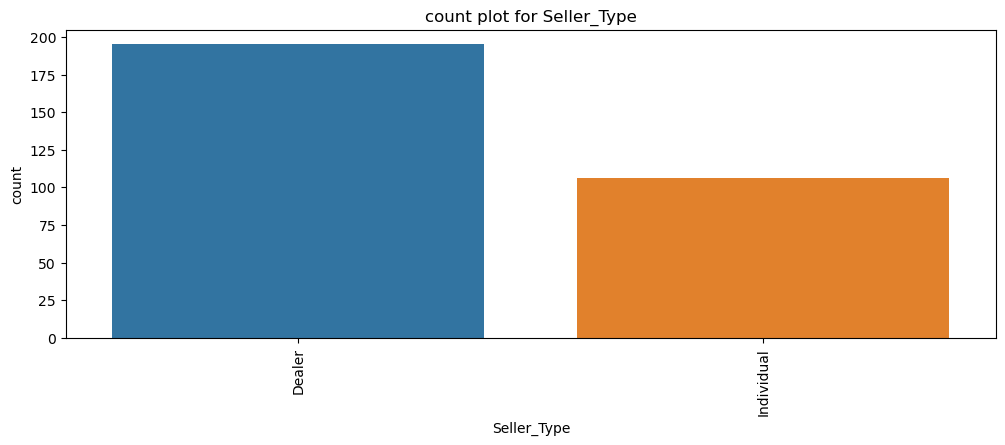

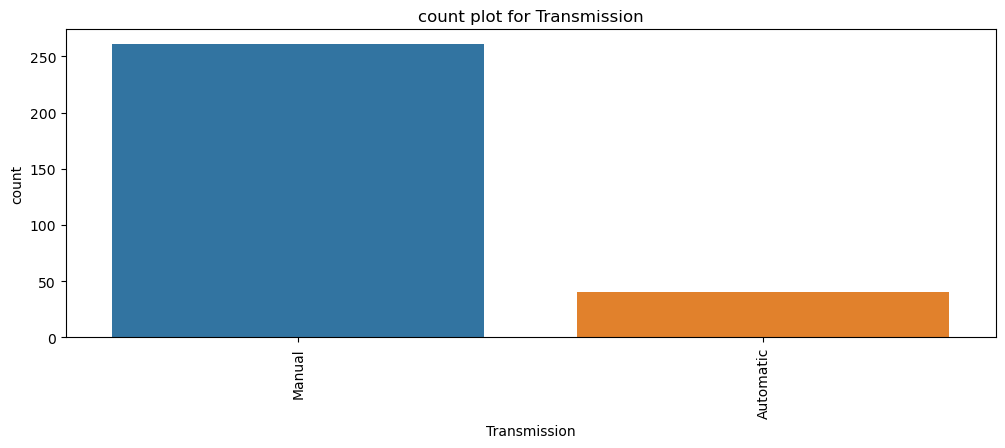

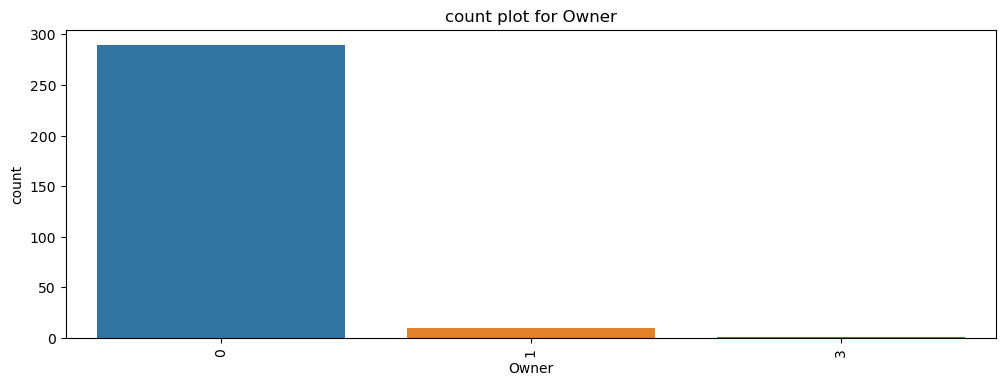

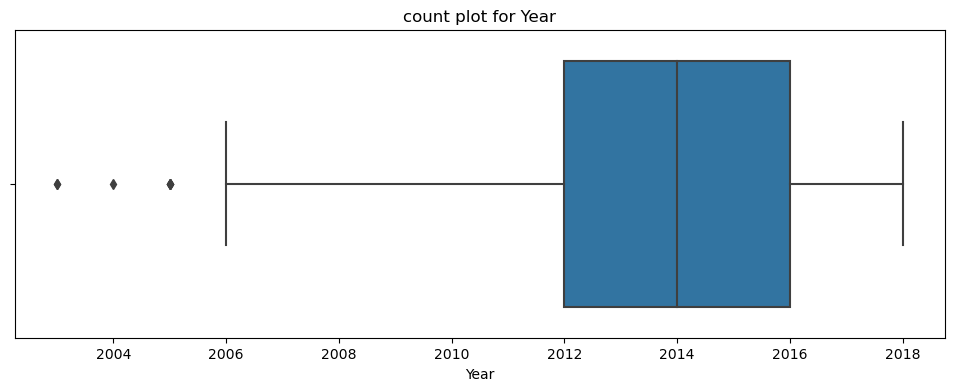

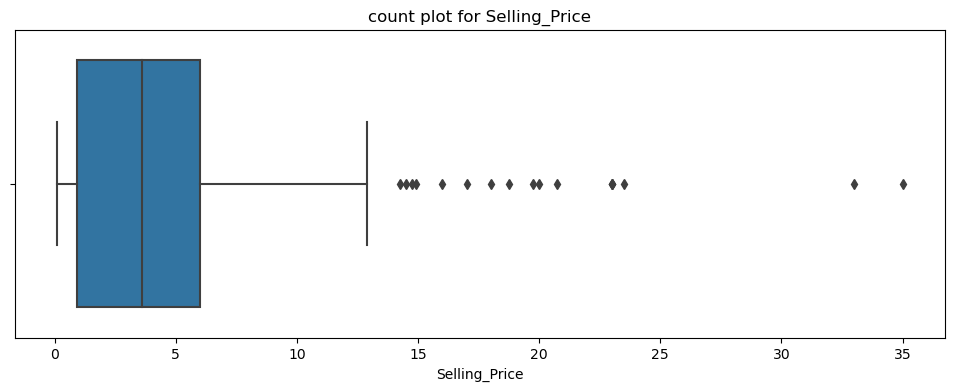

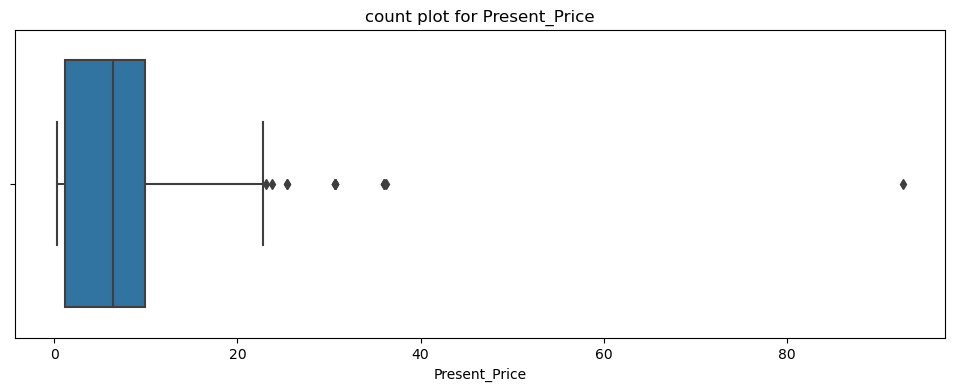

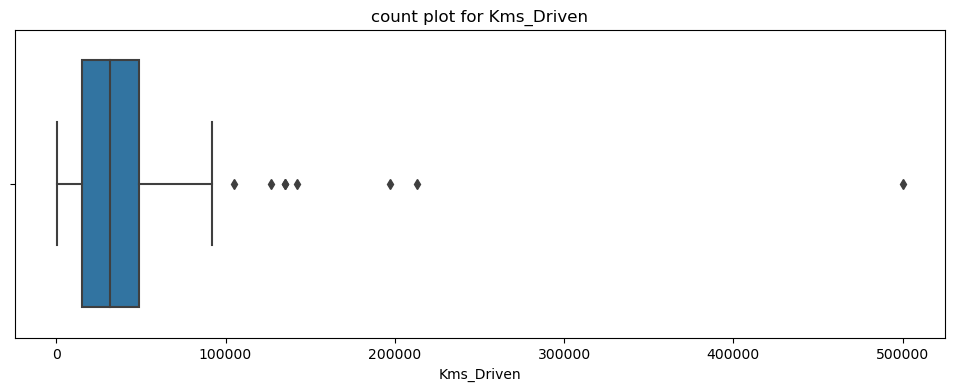

In [8]:
data_car_columns1 = ['Car_Name','Fuel_Type','Seller_Type','Transmission','Owner']
data_car_columns2 = ['Year','Selling_Price','Present_Price','Kms_Driven']
for column in data_car_columns1:
    plt.figure(figsize=(12,4))
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=car_data) #show the counts of observation in each categorical bin using bars.
    plt.title(f'count plot for {column}')
    plt.show()
for column in data_car_columns2:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=column, data=car_data) #show the counts of observation in each categorical bin using bars.
    plt.title(f'count plot for {column}')
    plt.show()

In [9]:
object_columns = [col for col in car_data.select_dtypes(include='object').columns]
print(object_columns)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [10]:
encoded_data = pd.get_dummies(car_data, columns=object_columns, drop_first=True)
#Assume that all Yes are 1 and all 0 are No.
encoded_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [11]:
y = encoded_data['Selling_Price'].values #here is the y values in an array
X = encoded_data.drop('Selling_Price', axis=1).values
#print(y)
#print(X)

In [12]:
scaler = StandardScaler()
#fit_transform learns the transformation parameters from the training data and applies the transformation
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.128897   -0.23621461 -0.25622446 ...  0.50932723 -0.73728539
   0.39148015]
 [-0.21751369  0.22150462  0.1559105  ... -1.96337432 -0.73728539
   0.39148015]
 [ 1.16812909  0.25742689 -0.77396901 ...  0.50932723 -0.73728539
   0.39148015]
 ...
 [-1.60315648  0.39068691  1.31334003 ...  0.50932723 -0.73728539
   0.39148015]
 [ 1.16812909  0.56450434 -0.7198763  ... -1.96337432 -0.73728539
   0.39148015]
 [ 0.8217184  -0.20029235 -0.81095812 ...  0.50932723 -0.73728539
   0.39148015]]


### Gradient Descent

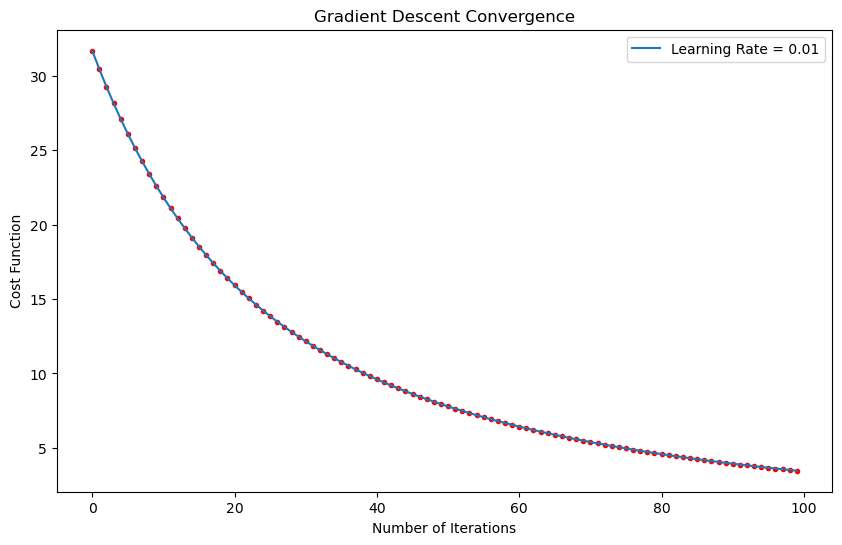

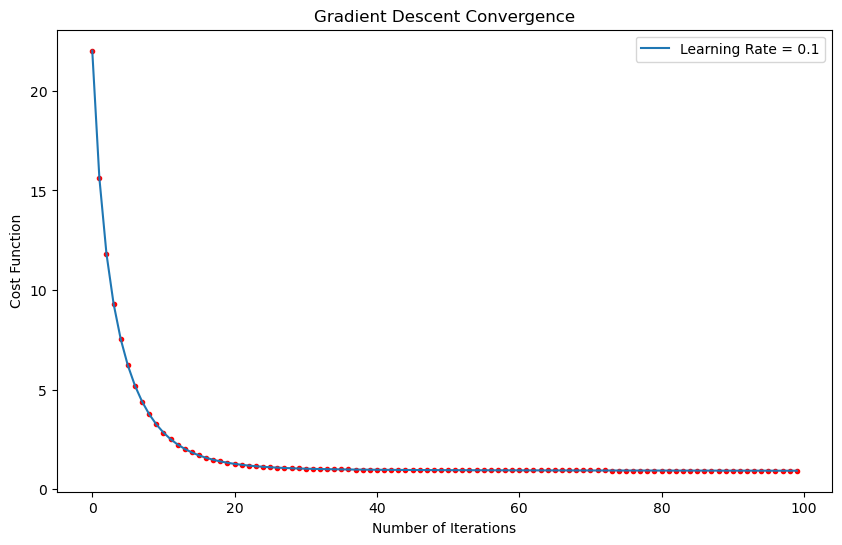

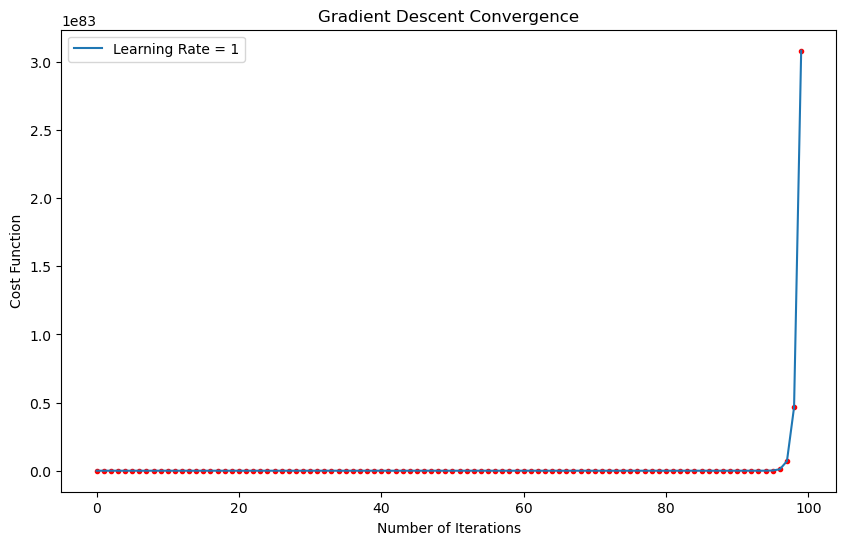

In [13]:
def cost_function(X, y, theta):

    #m: # of training examples
    m = len(y)
    pred = X.dot(theta)
    J = (1/(2*m)) * np.sum(np.square(pred-y))
    
    return J

def gradient_descent(X, y, theta, alpha, i):

    m = len(y)
    cost_hist = []
    for k in range(i):
        theta = theta - (1/m)*alpha*(X.T.dot(X.dot(theta)-y))
        cost = cost_function(X,y,theta) #update the cost
        cost_hist.append(cost)
    
    return theta, cost_hist


learning_rates = [0.01,0.1,1]
num_iterations = 100

X_b = np.c_[np.ones((len(X_scaled),1)),X_scaled]

for alpha in learning_rates:
    theta_initial = np.random.rand(X_b.shape[1])
    theta_final, cost_history = gradient_descent(X_b, y, theta_initial, alpha, num_iterations)
    
    
    # Plot cost function over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_iterations), cost_history, label=f'Learning Rate = {alpha}')
    plt.legend()
    plt.scatter(range(num_iterations), cost_history, color='red', marker='.')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Gradient Descent Convergence')
    plt.show()
    
    #print(f'For learning rate {alpha}, first cost:', cost_history[0])
    #print(f'For learning rate {alpha}, last cost:', cost_history[-1])



From above, we can see that the for the different learning rates cost function shows different characteristics. For example, for learning rate for 0.001, the convergence happens toward the end of number of iterations. On the other hand, for learning rate = 0.1, convergence become visible after about 30 iterations. Finally for learning rate = 1, it diverges. 

There can be several methods to find the most suitable learning rate for the convergence. 

One of the easiest I can think of is to try the code for several learning rates and plot them to see the results visually. This way some adjustments on the number of iterations can be made.

Another one can be to set a convergence threshold for the cost function and stop the iterations after the convergence observed. For this a ratio as the convergence threshold can be determined from seeing that the cost value does not change that much. In order to understand this cost[k-1]-cost[k]/cost[k] < convergence_threshold can implemented.

the chosen learning rate reaches the boundary of this convergence threshold of the cost function. For this a simple if check may be provided in the gradient_descent function.

One final suggestion may be to adjust the decay of the learning rate such that at first the learning rate is higher and gets smaller as the number of iterations increases in order not to diverge.

From the second suggestion, plots can be different as follows by a simple adjustment:

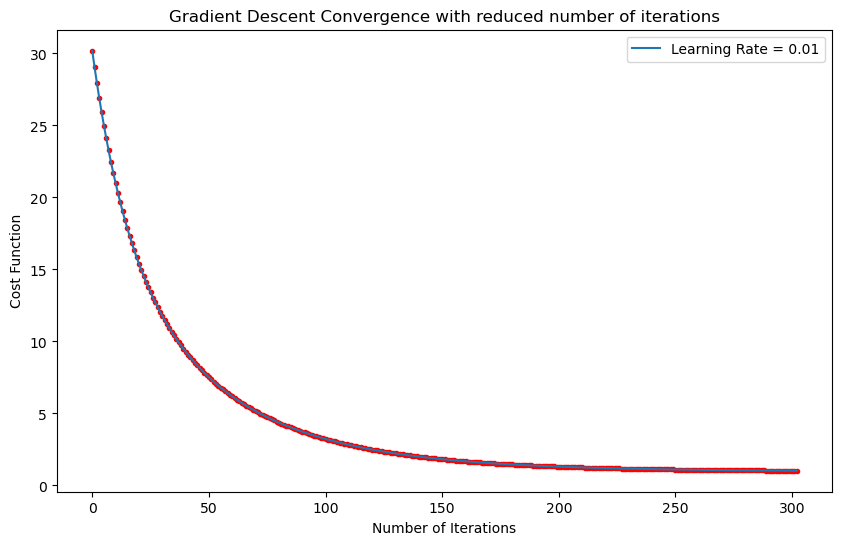

For the learning rate: 0.01 ,number of iterations needed 303


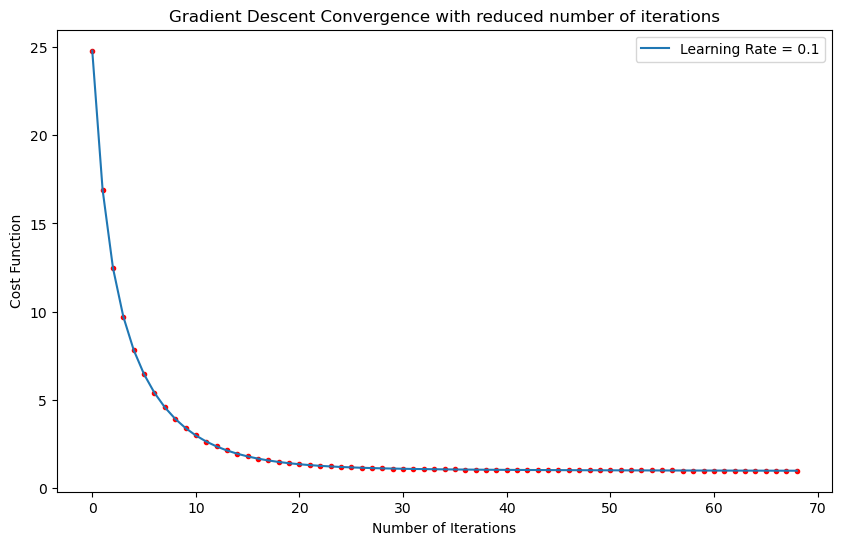

For the learning rate: 0.1 ,number of iterations needed 69


C:\Users\defne\AppData\Local\Temp\ipykernel_11016\935258373.py:19: RuntimeWarning: invalid value encountered in scalar divide
  if abs(cost_hist[k-1]-cost_hist[k])/cost_hist[k] < 0.001:
C:\Users\defne\AppData\Local\Temp\ipykernel_11016\935258373.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(cost_hist[k-1]-cost_hist[k])/cost_hist[k] < 0.001:
C:\Users\defne\AppData\Local\Temp\ipykernel_11016\935258373.py:6: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * np.sum(np.square(pred-y))


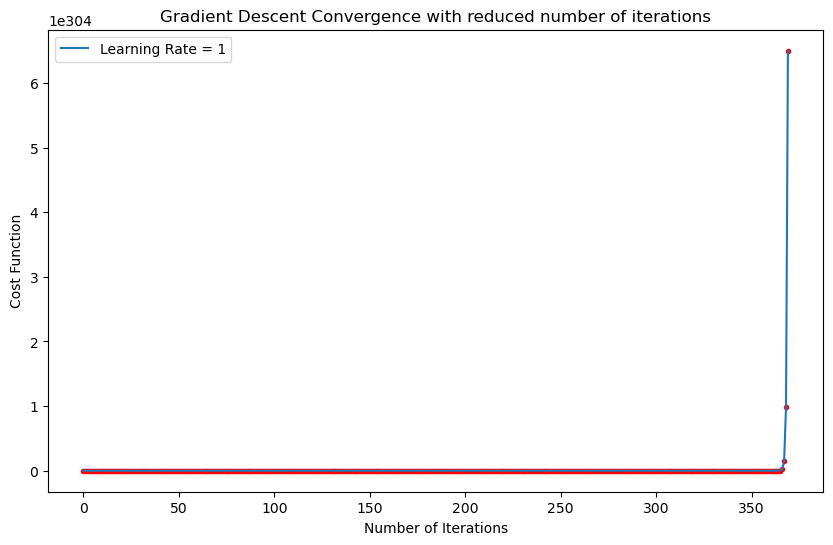

For the learning rate: 1 ,number of iterations needed 1000


In [41]:
def cost_function(X, y, theta):

    #m: # of training examples
    m = len(y)
    pred = X.dot(theta)
    J = (1/(2*m)) * np.sum(np.square(pred-y))
    
    return J

def gradient_descent(X, y, theta, alpha, i):

    m = len(y)
    cost_hist = []
    for k in range(i): 
        theta = theta - (1/m)*alpha*(X.T.dot(X.dot(theta)-y))
        cost = cost_function(X,y,theta) #update the cost
        cost_hist.append(cost)
        if (k > 1):
            if abs(cost_hist[k-1]-cost_hist[k])/cost_hist[k] < 0.001:
                break

    return theta, cost_hist



learning_rates = [0.01,0.1,1]
num_iterations = 1000

X_b = np.c_[np.ones((len(X_scaled),1)),X_scaled]

for alpha in learning_rates:
    theta_initial = np.random.rand(X_b.shape[1])
    theta_final, cost_history = gradient_descent(X_b, y, theta_initial, alpha, num_iterations)
    
    
    # Plot cost function over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning Rate = {alpha}')
    plt.legend()
    plt.scatter(range(len(cost_history)), cost_history, color='red', marker='.')
    
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Gradient Descent Convergence with reduced number of iterations')
    plt.show()
    #print(f'For learning rate {alpha}, first cost:', cost_history[0])
    #print(f'For learning rate {alpha}, last cost:', cost_history[-1])
    print(f'For the learning rate: {alpha} ,number of iterations needed {len(cost_history)}')



From here it can be observed that with the proposed strategy, for learning rates: 0.01 and 0.1 the number of iterations are 139 and 32 respectively for the convergence threshold selected as 0.01.However for learning rate = 1 the strategy did not work. 

In [249]:
#cite 
#Open sources are used for the general case, I included some websites that were the most useful.
#: https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048
# scikit-learn: https://scikit-learn.org/stable/index.html
# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
# https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8